<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

#  CDF Capstone Project GROUP 1009
# Exploratory Data Analysis on Insaid Telecom.


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)
  - **5.2** [**Identification & Handling of Missing Data**](#Section52)<br>
  - **5.3** [**Feature Engineering**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Summary And Conclusion**](#Section7)<br>
- **7.1** [**Actionable Insights**](#Section71)



---
<a name = Section1></a>
# **1. Introduction**
---
- Company Introduction
- company for this project is InsaidTelecom.
- InsaidTelecom, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.
- Currently, InsaidTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active daily in India
They are doing this to help their clients better understand and interact with their audiences


<a name = Section12></a>
### **1.1 Assumptions Logistic Regression**

- It assumes that there is **minimal**,or **no multi-collinearity** among the independent variables.
- It assumes that independent variables are **linearly related** to **log of odds**.
- It assumes that the **observations are independent** of each other.
- There is no **influential values(outliers)** in the **continous predictors(independent variables)**.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- Current Scenario
- In this consulting assignment, Insaidians are expected to build a dashboard.
- This dashboard will help us to understand a user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts.
- These efforts are relevant to their users and cater to their preferences.
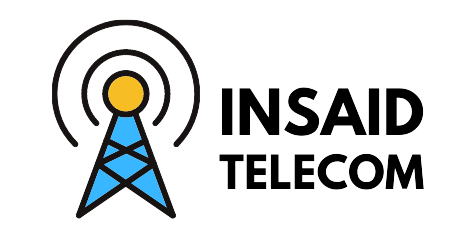


- To help the customer the consultants are expected to have depth of clarity in the underlying data.
- How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data.
- Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.



---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install folium

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
#!pip install -q --upgrade yellowbrick
#!pip install opendatasets --upgrade --quiet            
#!pip install pandas-profiling==3.2.0
#!pip install visions==0.7.4
#!pip install markupsafe==2.0.1 

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import os
import warnings
warnings.simplefilter(action='ignore')
import mysql.connector as connection
import folium
from folium.plugins import HeatMap

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of the information about people boarding the Telecom churn Prediction . Various variables present in the dataset includes data of customerID,gender etc. 
- The Train dataset comprises of __3252950 observations of 7 columns__. Below is a table showing names of all the columns and their description.

# Dataset Description

- The Data is collected from mobile apps that use Inside Telecom services. Full recognition and consent from an individual user of those apps have been obtained, and appropriate anonymization has been performed to protect privacy. 
- Due to confidentiality, we won't provide details on how the gender and age data were obtained.
- Please treat them as accurate ground truth for prediction.
- The data schema can be represented in the following table:
- gender_age_train - Devices and their respective user gender, age and age_group
- phone_brand_device_model - device ids, brand, and models phone_brand: note that few brands are in Chinese

##### Brand Name	: Brand English Mapping
        - '华为'	      'Huawei'
        - '小米'	      'Xiaomi'
        - '三星'	      'Samsung'
        - 'vivo'	      'vivo'
        - 'OPPO'	      'OPPO'
        - '魅族'	      'Meizu'
        - '酷派'	      'Coolpad'
        - '乐视'	      'LeEco'
        - '联想 '	      'Lenovo'
        - 'HTC'	      'HTC'
#### Events_data:
- When a user uses mobile on an INSAID Telecom network, the event gets logged in this data.
- Each event has an event id, location (lat/long), and the event corresponds to the frequency of mobile usage. timestamp: when - the user is using the mobile.

In [4]:
!pip3 install mysql-connector-python-rf

In [5]:
df=pd.read_csv(r"events_data.csv")
print(f"shape of raw dataset:eventdf-{df.shape}")
# df=df[df['state']=='Maharashtra']
print(f"shape of dataset post filter:eventdf-{df.shape}")
# print(df.describe())
# print(df.head())
# ==========Read the dataset=================================
host='cpanel.insaid.co'
user='student'
passwd='student'
database='Capstone1'

conn = connection.connect(host=host, database =database,user=user, passwd=passwd)
query = "Select * from gender_age_train;"
device_df = pd.read_sql(query,conn)

query1="Select * from phone_brand_device_model"
phone_df = pd.read_sql(query1,conn)
conn.close() #close the connection
lookupdf=pd.read_csv(r"phonetranslate.csv")
lookupdf1=pd.read_csv(r"devicetranslate.csv")
print(f"shape of phone_df dataset:brandname-{lookupdf.shape}")
print(f"shape of phone_df dataset:devicemodelname-{lookupdf1.shape}")

print("##====SQL TABLE1==========")
print(f"shape of phone_df,{phone_df.shape}")
print(f"shape of lookuphbrand_df,{lookupdf.shape}")
phonelookup=pd.merge(phone_df,lookupdf,left_on=['phone_brand'],right_on=['brand'])
print(f"shape of mergelookupphone_brandname,{phonelookup.shape}")
print(f"shape of lookupdevicemodel,{lookupdf1.shape}")
devicemodellookup=pd.merge(phonelookup,lookupdf1,left_on=['device_model'],right_on=['model'])
print(f"shape of mergelookupdevicemodel,{devicemodellookup.shape}")
print(devicemodellookup.info())
devicemodellookup=devicemodellookup[['device_id','brandname','modelname']]
devicemodellookup.rename(columns={'brandname':'phone_brand','modelname':'device_model'},inplace=True)
phone_df1=devicemodellookup.copy()
print(phone_df1.head())
print("##====SQL TABLE2==========")
print(f"shape of device_df,{device_df.shape}")
print(device_df.head())
print("##====MERGE WITH PARENT TABLE==========")  
# 751697
print(df.columns)
merge_device=pd.merge(df,device_df,on='device_id',how='left')
merge_device.drop_duplicates(inplace=True)
# print(f"shape of merge(device_df,event),{merge_device.shape}")
# print(merge_device.info(verbose=True, show_counts=True))
#merge_device.to_csv(r'merge.csv')
merge_phone=pd.merge(merge_device,phone_df1,on='device_id',how='left')
merge_phone.drop_duplicates(inplace=True)
#merge_phone.to_csv(r'finaldata.csv')
# print(device_df.columns)
# print(phone_df1.columns)
# print(f"shape of merge(device_df,event,phone),{merge_phone.shape}")
# print(merge_phone.info(verbose=True, show_counts=True))
# print(merge_phone.head())

shape of raw dataset:eventdf-(3252950, 7)
shape of dataset post filter:eventdf-(3252950, 7)
shape of phone_df dataset:brandname-(116, 3)
shape of phone_df dataset:devicemodelname-(1467, 3)
##====SQL TABLE1==========
shape of phone_df,(87726, 3)
shape of lookuphbrand_df,(116, 3)
shape of mergelookupphone_brandname,(87726, 6)
shape of lookupdevicemodel,(1467, 3)
shape of mergelookupdevicemodel,(87726, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
 3   Unnamed: 0_x  87726 non-null  int64 
 4   brand         87726 non-null  object
 5   brandname     87726 non-null  object
 6   Unnamed: 0_y  87726 non-null  int64 
 7   model         87726 non-null  object
 8   modelname     87726 non-null  object
dtypes: int64(3), object

In [6]:
merge_phone.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2765368,2973347786994914304.00000,2016-05-07 22:52:05,77.22568,28.73014,Delhi,Delhi,M,35.00000,M32-38,Quality rice,UIMI3
1,2955066,4734221357723754496.00000,2016-05-01 20:44:16,88.38836,22.66033,Calcutta,WestBengal,NaN,NaN,NaN,NaN,NaN
2,605968,-3264499652692492800.00000,2016-05-02 14:23:04,77.25681,28.75791,Delhi,Delhi,NaN,NaN,NaN,NaN,NaN
3,448114,5731369272434022400.00000,2016-05-03 13:21:16,80.34361,13.15333,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
4,665740,338888002570799936.00000,2016-05-06 03:51:05,85.99774,23.84261,Bokaro,Jharkhand,NaN,NaN,NaN,NaN,NaN


In [7]:
merge_phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_id      int64  
 1   device_id     float64
 2   timestamp     object 
 3   longitude     float64
 4   latitude      float64
 5   city          object 
 6   state         object 
 7   gender        object 
 8   age           float64
 9   group         object 
 10  phone_brand   object 
 11  device_model  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 322.6+ MB


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [8]:
print("Shape of our Data is :", merge_phone.shape)

Shape of our Data is : (3252950, 12)


In [9]:
final_df =merge_phone.copy()

In [10]:
def preprocess(df):
    df['gender']=df['gender'].fillna(df['gender'].mode()[0])
    df['group']=df['group'].fillna(df['group'].mode()[0])
    df['phone_brand']=df['phone_brand'].fillna(df['phone_brand'].mode()[0])
    df['device_model']=df['device_model'].fillna(df['device_model'].mode()[0])
    df['age']=df['age'].replace('.','').fillna(df['age'].median())
    df['age']=df['age'].astype('int32')
    df['timestamp']=pd.to_datetime(df['timestamp'])
    mappings={
'Pune':'Maharashtra',
'Visakhapatnam':'AndhraPradesh',
'Indore':'MadhyaPradesh',
'Chennai':'TamilNadu',
'Delhi':'Delhi',
'Channapatna':'Karnataka',
'Jaipur':'Rajasthan',
'Gangarampur':'WestBengal',
'Arambagh':'WestBengal'}
    df['state']=df['state'].fillna(df["city"].map(mappings))
    df['device_id']=df['device_id'].apply(lambda x: '%.5f' % x)
    df['device_id']=df['device_id'].fillna(df['device_id'].mode()[0])
preprocess(final_df) 
final_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_id      int64         
 1   device_id     object        
 2   timestamp     datetime64[ns]
 3   longitude     float64       
 4   latitude      float64       
 5   city          object        
 6   state         object        
 7   gender        object        
 8   age           int32         
 9   group         object        
 10  phone_brand   object        
 11  device_model  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory usage: 310.2+ MB


**Observation:**

- There are **very few null values present** in **device_id,longitude,latitude**.

- **Time stamp** seems to have **Wrong data type** we have to change it to datetime.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [11]:
final_df.describe()

,event_id,longitude,latitude,age
count,3252950.00000,3252527.00000,3252527.00000,3252950.00000
mean,1626475.50000,78.15868,21.68851,30.01270
std,939045.92342,4.23557,5.78911,0.68436
min,1.00000,12.56700,8.19011,10.00000
25%,813238.25000,75.83543,17.80171,30.00000
50%,1626475.50000,77.26814,22.16454,30.00000
75%,2439712.75000,80.31916,28.68278,30.00000
max,3252950.00000,95.45946,41.87190,79.00000


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [12]:
#profile = ProfileReport(df = telecom_train_df)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

In [13]:
# Preprocess the data

In [14]:
final_df=final_df[(final_df['longitude']>=69.109835) & (final_df['longitude']<=86.725595)]
final_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026542 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_id      int64         
 1   device_id     object        
 2   timestamp     datetime64[ns]
 3   longitude     float64       
 4   latitude      float64       
 5   city          object        
 6   state         object        
 7   gender        object        
 8   age           int32         
 9   group         object        
 10  phone_brand   object        
 11  device_model  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory usage: 288.6+ MB


<a name = Section52></a>
### **5.1 Identification & Handling of Missing Data**

- In this section we will **analyze** and **identify** **missing information** such as **null data** and **zero data**.

In [15]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = final_df.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = final_df.isnull().sum().values

#Calculating the percentage of null values
nullpercent = final_df.isnull().sum().values/final_df.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = final_df[final_df == 0].count().values

#Calculating the Percentage of Zero
zero_percent = final_df[final_df == 0].count().values / final_df.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


- We have <0.1% of null data in logitude and latitude
- Dropping thses values will be good option as dropping them wont affect our data much

In [16]:
final_df.dropna(subset=['longitude','latitude'], inplace=True)

- Let's verify the integrity of null values again.

In [17]:
#Creating a New dataframe
missing_frame = pd.DataFrame(index = final_df.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = final_df.isnull().sum().values

#Calculating the percentage of null values
nullpercent = final_df.isnull().sum().values/final_df.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = final_df[final_df == 0].count().values

#Calculating the Percentage of Zero
zero_percent = final_df[final_df == 0].count().values / final_df.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


- changing time satmp to date time format.

In [18]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026542 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   event_id      int64         
 1   device_id     object        
 2   timestamp     datetime64[ns]
 3   longitude     float64       
 4   latitude      float64       
 5   city          object        
 6   state         object        
 7   gender        object        
 8   age           int32         
 9   group         object        
 10  phone_brand   object        
 11  device_model  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(7)
memory usage: 288.6+ MB


In [20]:
final_df['device_id'].nunique()
users=final_df.drop_duplicates(subset='device_id',keep='first')

Maharashtra        9010
Karnataka          6481
TamilNadu          5770
AndhraPradesh      4929
Delhi              4909
UttarPradesh       3660
MadhyaPradesh      3221
Rajasthan          3093
Telangana          3045
Gujarat            1749
Bihar              1197
Punjab             1055
Kerala              939
Haryana             816
Jharkhand           679
Orissa              583
Chhattisgarh        400
Uttaranchal         258
JammuandKashmir     236
Pondicherry          96
Goa                  76
Chandigarh           35
HimachalPradesh      31
WestBengal           27
Name: state, dtype: int64


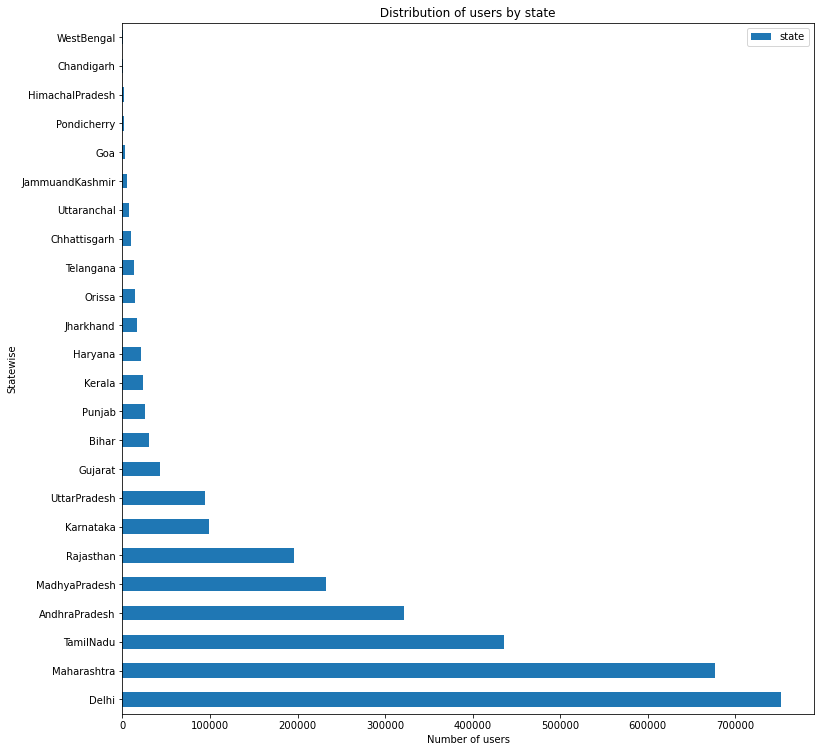

In [21]:
fig2=plt.figure(figsize=(12,12))
ax=fig2.add_axes([0.1,0.1,0.8,0.8])
final_df['state'].value_counts().plot(kind='barh')
print(users['state'].value_counts())
plt.xlabel("Number of users")
plt.ylabel("Statewise")
plt.xticks(rotation=0)
plt.legend()
plt.title(" Distribution of users by state ")
plt.show() 

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

## Univarient Analysis.

- Frequency of Events with respect to Time
- Distribution of Brand of Mobile Phones among Customers
- Mobile Phone users based on Gender
- Distribution of different Age Groups

#### Q1 Most Popular Mobile Phone Brand?

In [22]:
brand = final_df.phone_brand.value_counts()

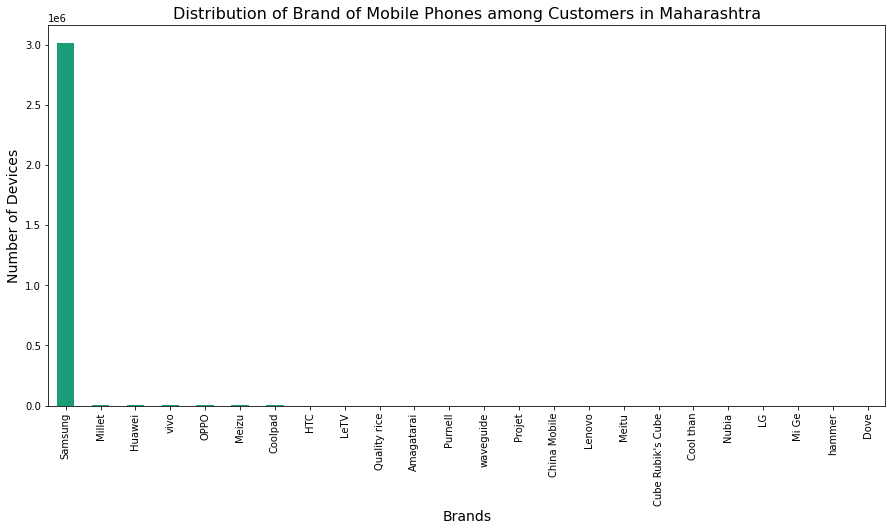

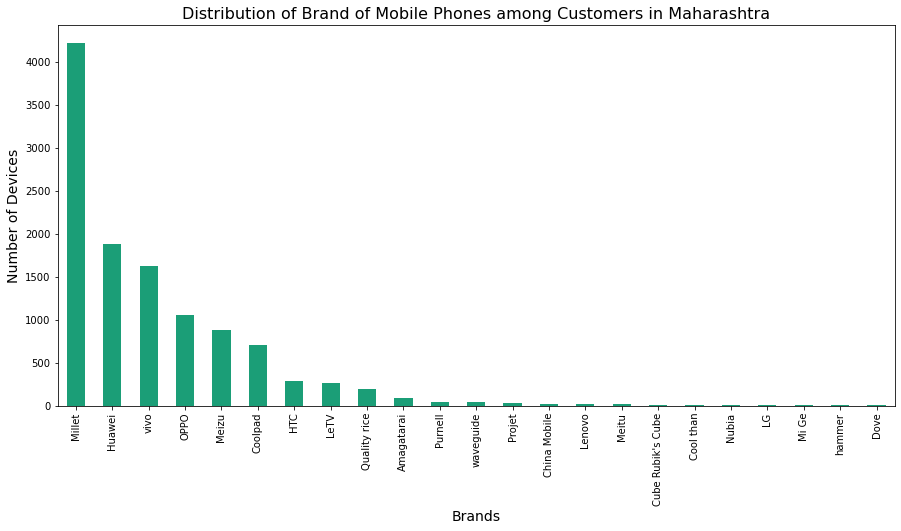

In [23]:
figure = plt.figure(figsize=[15, 7]) #canvas
brand.plot.bar(color='#1B9E77')

plt.xlabel(xlabel='Brands', size=14)
plt.ylabel(ylabel='Number of Devices', size=14)
plt.title(label='Distribution of Brand of Mobile Phones among Customers in Maharashtra', size=16)

plt.show()

figure = plt.figure(figsize=[15, 7]) #canvas
brand[1:].plot.bar(color='#1B9E77')

plt.xlabel(xlabel='Brands', size=14)
plt.ylabel(ylabel='Number of Devices', size=14)
plt.title(label='Distribution of Brand of Mobile Phones among Customers in Maharashtra', size=16)

plt.show()


**Observation:**

- We can observe that max users in maharashtra uses samsung mobile .
- Creating 2 bar chart as in 1st one samsung is taking up all the bar length and its difficult to visualize other brands.

#### Q2 Age Distribution of Users ?

In [24]:
age = final_df.age.value_counts(ascending = False)

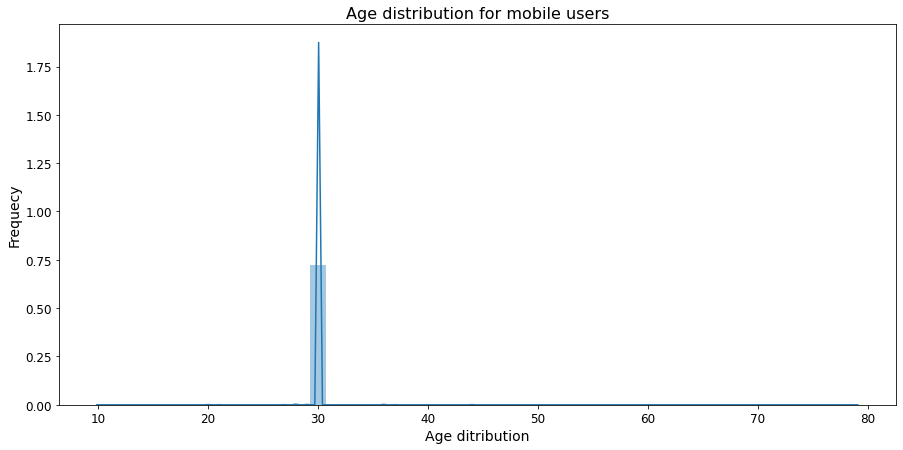

In [25]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=final_df['age'], kde=True)

# Add some cosmetics
plt.title(label='Age distribution for mobile users', size=16)
plt.xlabel(xlabel='Age ditribution', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

# Display the plot
plt.show()

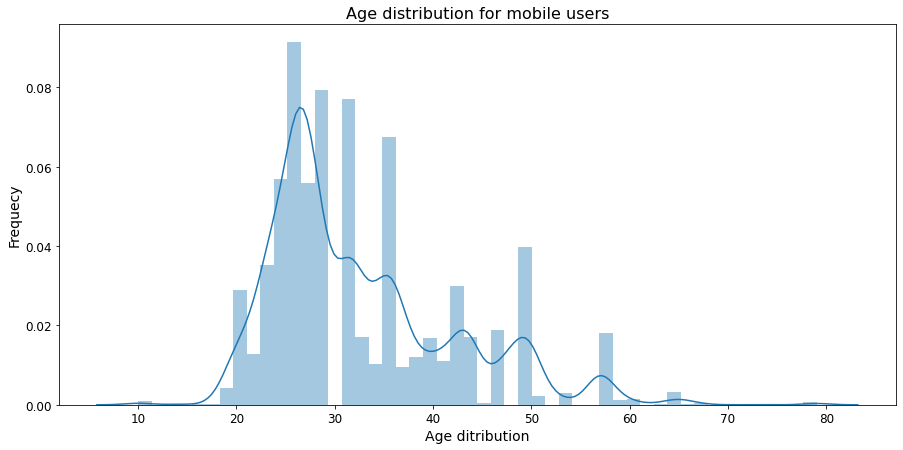

In [26]:
# Initialize figure of size 15 X 7
fig = plt.figure(figsize=(15, 7))

# Plot density distribution of age
sns.distplot(a=final_df[final_df['age'] != 30].age, kde=True)

# Add some cosmetics
plt.title(label='Age distribution for mobile users', size=16)
plt.xlabel(xlabel='Age ditribution', size=14)
plt.ylabel(ylabel='Frequecy', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

# Display the plot
plt.show()

**Observation:**

- We can observe that age group of 30 yr are the most no of user .
- As its taking all the bar length , So making other bar graph excluding 30 yr age group.
- Then comes agr of 26-45 is the oher largest group of users.

#### Q3 - Desity of users across India ?

In [27]:
lat, lon = final_df.latitude[0], final_df.longitude[0]
lat, lon

(28.73014, 77.22567599999998)

In [28]:
for x in final_df[['latitude', 'longitude']].sample(100).iteritems():
    print(x[1])

2182549   19.04136
1818829   17.78808
2904437   28.68560
2790490   13.13392
1365181   19.95118
2949143   13.12849
789927    18.54860
3122652   28.75466
799703    22.79382
1475444   19.04604
2740960   28.68981
91448     22.81221
3202185   28.74361
2250693   28.76659
607224    27.01678
2342999   22.80064
2443205   26.98032
1003965   10.83512
1676327   22.76201
2180443   17.81119
2059584   20.03265
2473678   27.58119
1926799   28.70100
3225795   18.56142
2043053   13.13605
1063496   28.68300
1923019   18.97189
2724484   19.05387
1315069   18.57247
661977    16.79258
9307      28.71665
3160077   13.12817
1561980   17.74753
2400189   19.04683
755922    28.74646
991249    28.71354
1908682   14.48140
150485    28.74529
1549319   19.03704
3171083   26.96989
1345189   26.93264
1715383   28.74604
2376928   26.95595
1084378   13.17637
2944157   17.79701
768320    28.72248
777004    18.58971
1769294   13.10661
1579522   28.68699
1986637   10.54252
2026901   28.72920
2367171   18.54576
1648297   19

In [29]:
zip(list(final_df.latitude), list(final_df.longitude))

In [30]:
sample_df = final_df.sample(int(0.002 * len(final_df)))
lat_lon_pairs = list(zip(list(sample_df.latitude), list(sample_df.longitude)))

In [31]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map
#you can use mouse scroller to zoom in or out and can check the hot spot ares in different city/ states.

#### Q4 What's The time Most of the users are Active?

In [32]:
final_df.timestamp[0]

Timestamp('2016-05-07 22:52:05')

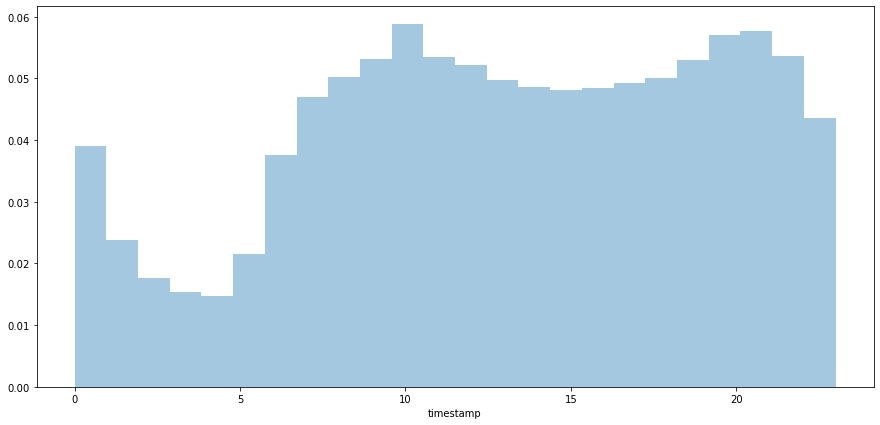

In [33]:
fig = plt.figure(figsize=(15, 7))
sns.distplot(final_df.timestamp.dt.hour,bins=24,kde=False,norm_hist=True)
plt.show()
#we use normhist to covery Y axis into %.

**Observation:**

- We can observe that from 9AM - 8PM Most of the users are active
- Peak times where most of the users active are 10AM And From 4PM - 8PM

**Q5- Distribution of Users across Gender**

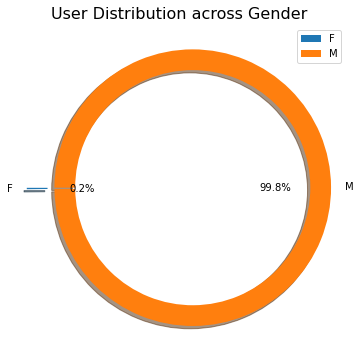

In [34]:
fig2=plt.figure(figsize=(6,6))
data = final_df['gender'].value_counts().sort_index()
labels, sizes = data.index, data.values
explode_list = np.ones(len(final_df['gender'].unique()))/10
plt.pie(x=sizes, labels=labels,explode=explode_list, autopct='%1.1f%%', 
            startangle=180, shadow=True, wedgeprops=dict(width=0.15))	
plt.axis('equal')
plt.title(label='User Distribution across Gender', size=16)	
plt.legend()
plt.show()

**Observation**
- Around 99.8% of users are Male and only 0.2% are female consumers.
- Another reason females are using sim in thier male family members registered name.

#### Q6- Distribution of Users across Age Segments.

F23-          557
F24-26        500
F27-28        644
F29-32        895
F33-42        971
F43+         1272
M22-          730
M23-26    3013710
M27-28       1516
M29-31       1996
M32-38       1896
M39+         1855
Name: group, dtype: int64


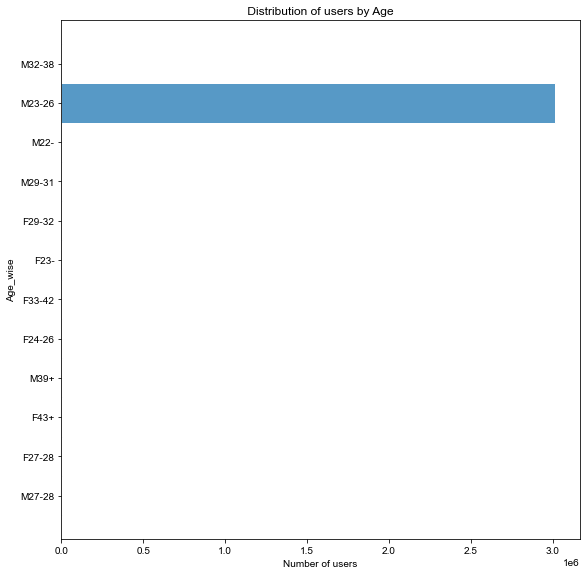

In [35]:
# Distribution of Users across Age Segments.
fig2=plt.figure(figsize=(9,9))
ax=fig2.add_axes([0.2,0.2,0.8,0.8])
print(final_df['group'].value_counts().sort_index())
plt.xlabel("Number of users")
plt.ylabel("Age_wise")
plt.title(" Distribution of users by Age ")
sns.set_style('darkgrid')
sns.histplot(y='group',data=final_df) 
plt.show() 

**Observation**
- Majority of users are male ,falling in the age group 23-26 followed by M32-38.
- Top female users belong to age group F23,F33-42 and F24-26.


#### Q7-Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.

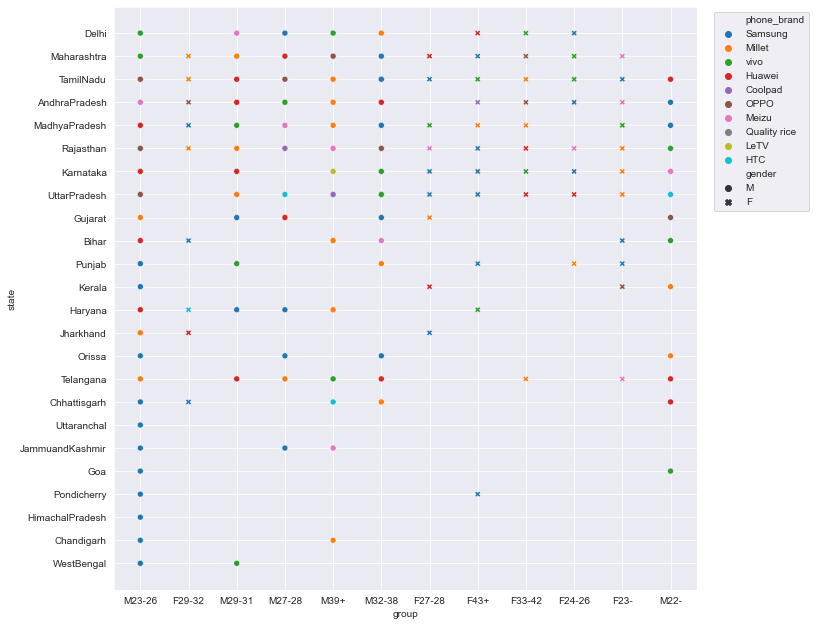

['Samsung', 'Millet', 'Huawei', 'vivo', 'OPPO', 'Meizu', 'Coolpad', 'HTC', 'LeTV', 'Quality rice']
For Samsung-99.62396028206449
For Millet-0.13933393291750124
For Huawei-0.06198493197847576
For vivo-0.0537907618661826
For OPPO-0.03469305894317674
For Meizu-0.029208251529303078
For Coolpad-0.023128705962117822
For HTC-0.009449728435950997
For LeTV-0.008854990282639395
For Quality rice-0.006409955652358368


In [36]:
df2=final_df.groupby(['group','state','gender'])['phone_brand'].value_counts().sort_values(ascending=False).to_frame()
df2.rename(columns = {'phone_brand':'phbrand'}, inplace = True)
df2.reset_index(inplace=True)
df2.drop(columns=['phbrand'],inplace=True)
topbrand=final_df['phone_brand'].value_counts().sort_values(ascending=False)[0:10]
df2=df2[df2['phone_brand'].isin(topbrand.index.tolist())]
fig5=plt.figure(figsize=(9,9))
ax=fig5.add_axes([0.1,0.1,0.9,0.9])
sns.scatterplot(data=df2,x='group',y='state',hue='phone_brand',style='gender')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()
print(topbrand.index.to_list())
totusers=final_df['phone_brand'].shape[0]
for i in range(10):
    brand=topbrand.index.to_list()[i]
    userpct=(final_df['phone_brand'].value_counts()[i]/totusers)*100
    print(f'For {brand}-{userpct}')

**Observation**
- Samsung phone usage is around 99.4% considering all states and age segments
- Least used phone brands are LeTV,Lenovo.
- *Below are insights from Maharashtra:-*
- Users  prefer 'Samsung','Huawei', 'OPPO', 'vivo', 'Meizu', 'Coolpad', 'HTC' phones and do not prefer Millet,LeTV and Lenovo.
- There are no mobile users in age segment M22.
- In Maharashtra,female users are more compared to male

#### Q8 Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands)

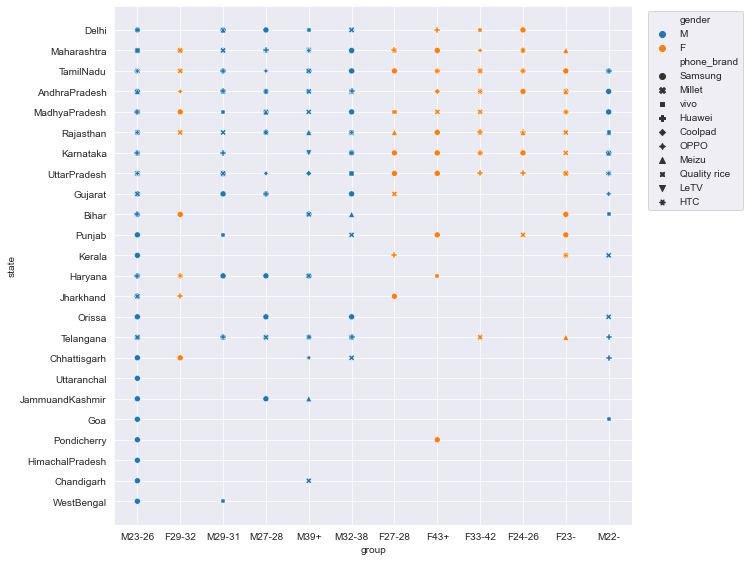

In [37]:
fig6=plt.figure(figsize=(8,8))
ax=fig6.add_axes([0.1,0.1,0.9,0.9])
sns.scatterplot(data=df2,x='group',y='state',hue='gender',style='phone_brand')
# plt.xticks(list(range(len(xlabel))), xlabel)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

#### Q9 Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands) ?

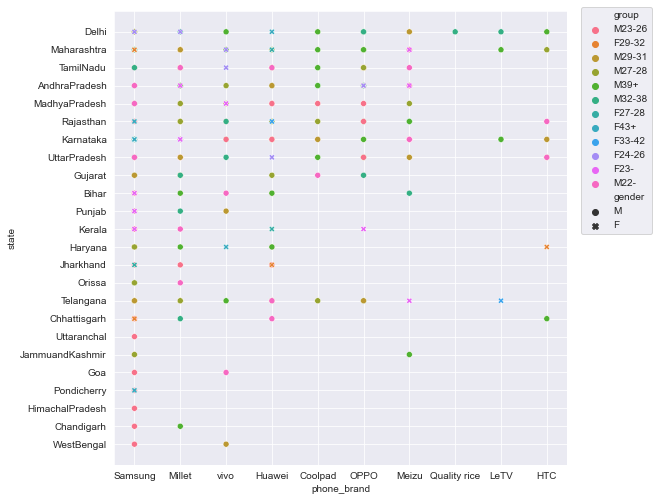

In [38]:
fig6=plt.figure(figsize=(7,7))
ax=fig6.add_axes([0.1,0.1,0.9,0.9])
sns.scatterplot(data=df2,x='phone_brand',y='state',hue='group',style='gender')
plt.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.show()

#### Q10 Hourly distribution of Phone Calls in Maharashtra?

20    39392
21    39139
7     37501
22    35689
10    35107
19    34530
8     33750
9     32901
11    32330
18    32180
12    31620
6     31103
17    30121
13    29972
14    29667
16    29621
15    29459
23    27878
0     22478
5     17147
1     13497
4     10760
3     10716
2     10351
Name: hours, dtype: int64


<AxesSubplot:title={'center':'Hourly phonecall distribution_Maharashtra'}, xlabel='Hours', ylabel='Frequency'>

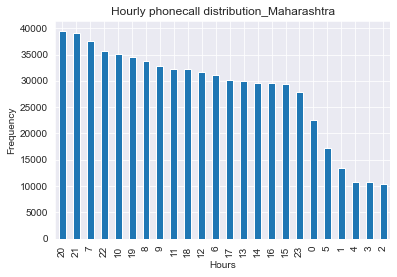

In [39]:
final_df['hours']=final_df['timestamp'].dt.hour
final_df['month']=final_df['timestamp'].dt.month
dfnew=final_df[(final_df['month']==5) & (final_df['state']=='Maharashtra')]
print(dfnew['hours'].value_counts())
xlabel=dfnew['hours'].sort_values().unique().tolist()
plt.xticks(list(range(len(xlabel))), xlabel)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Hourly phonecall distribution_Maharashtra")
dfnew['hours'].value_counts().sort_values(ascending=False).plot(kind='bar')


**Observation**
- In Maharashtra, most users make calls at night from 7pm -11pm.
- Majority of users 30k-35k users make calls during rest of hours.
- Calls reduces during midnight

<a name = Section7></a>

---
# **7. Summary and Conclusion**
---

- We can observe that max users in **maharashtra**
- We can observe that age group of **30 years** are the most no of user 
- Majority of users are **male** ,falling in the age group **23-26** followed by **M32-38**.
- In **Maharashtra**,female users are more compared to male
- **Top female** users belong to age group **F23,F33-42** and **F24-26**.
- We can observe that max users use **samsung** mobiles
- **Samsung** phone usage is around 99.4% considering all states and age segments
- **Least** used phone brands are **LeTV,Lenovo**.
- We can observe that from **9AM - 8PM** Most of the users are active
- Peak times where most of the users active are **10AM** And From **4PM - 8PM**


<a name = Section71></a>
### **7.1 Actionable Insight**


- The company should make a promotion to target **all** age groups.
- Companies should consult brands to make more **user-friendly mobiles** to make **adaption** easier for age groups less than **25** and more than **45**.
- The company can **launch** programs and **offers** for the age group between **30-35** to increase sales as they consist of **60%-70%** of the user base.
- The company should focus on states like **Uttaranchal, Nagaland, and Goa** to improve the company's presence and improve efforts to **retain** existing customers in **Madhya Pradesh, Andhra Pradesh, and Karnataka**.
- Females are depended on males to make use of phones, making better **ads** which show how phones can change and upscale their **lifestyles** will increase the useability among females.
- Females should be given **offers** and **better** plans to upscale and increase the usability of females. 
- The company should connect to the service provider to **increase bandwidth** from **10 AM to 4 PM** because of high usage.
- The company should collaborate with **other brands** to make good **competition** in the market for all brands.